<span style="color:pink"> Introducción a Experimentos con MLflow</span>



In [ ]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import logging


logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


En este notebook vamos a ver como podemos hacer tracking de nuestros experimentos con mlflow con diferentes modos de uso, es bueno que tengas en cuenta las diferentes opciones que te ofrece mlflow para hacer tracking de tus experimentos. Si esto te interesa tanto como a mí: 

<div style="text-align: center;">
  <img src="https://pbs.twimg.com/media/FURj-YsXoAAoXGo.jpg" alt="Descripción de la imagen" width="200" />
</div>


Esta es la forma más común de ejecutar MLflow, en este caso, MLflow se ejecuta en el mismo host donde se ejecuta el código de Python. Para ejecutar MLflow en localhost, simplemente ejecuta el siguiente comando en la línea de comandos:

```bash
mlflow ui


<p align="center">
  <img src="../images/local_host_mlflow.png" width="200" height="500">
</p>

<p align="center">Fuente: <a href="https://mlflow.org/docs/latest/tracking.html">mlflow</a></p>


Lo anterior iniciará un servidor web de MLflow en el puerto 5000 (por defecto). Para acceder a la interfaz de usuario de MLflow, abre la dirección que te retorna mlflow en tu navegador. Si presentas problemas con el puerto puedes especificar otro puerto ejecutando el comando 
```bash
mlflow ui --port
```

También podremos crear una carpeta de forma local e indicarle a mlflow que lo fijamos como *_set_tracking_uri_*
En la celda a continuación te enseñaré cómo hacerlo:

In [ ]:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

In [ ]:
mlflow.set_experiment("iris_experiment")
with mlflow.start_run(run_name = "example_1"):

    X, y = load_iris(return_X_y= True)
    params = {"C": 0.1, 
              "random_state": 42}
    mlflow.log_params(params)
    lr = LogisticRegression(**params).fit(X, y)
    y_pred = lr.predict(X)
    mlflow.log_metric("accuracy", accuracy_score(y, y_pred))
    mlflow.sklearn.log_model(lr, "model")
    print(f"default artifact location: '{mlflow.get_artifact_uri()}'")


Folder diferente a mlruns, se puede? Si, puedes crear una carpeta y especificarle a mlflow que lo fijamos como *_set_tracking_uri_*
. Para abrir el tracking folder en la termina, debemos especificar el path de la carpeta que creamos y ejecutar el siguiente comando:

mlflow ui --backend-store-uri file:////ruta_de_acceso_a_la_carpeta




In [1]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import logging


logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

/Users/mdurango/Proyect/Mlops-platzi/.venv/lib/python3.9/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/mdurango/Proyect/Mlops-platzi/.venv/lib/python3.9/site-packages/pydantic/_internal/_config.py:318: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [2]:
mlflow.end_run()

In [4]:
mlflow.set_experiment("iris_experiment_ml_local")
mlflow.set_tracking_uri("/Users/mdurango/Proyect/Mlops-platzi/tracking/experiment_ml")

with mlflow.start_run(run_name = "example_1"):

    X, y = load_iris(return_X_y= True)
    params = {"C": 0.1, 
              "random_state": 42}
    mlflow.log_params(params)
    lr = LogisticRegression(**params).fit(X, y)
    y_pred = lr.predict(X)
    mlflow.log_metric("accuracy", accuracy_score(y, y_pred))
    mlflow.sklearn.log_model(lr, "model")
    print(f"default artifact location: '{mlflow.get_artifact_uri()}'")

# en la terminal vamos a estar a nivel de la carpeta "experiment_ml" y ejecutamos lo siguiente   
# mlflow ui --backend-store-uri file:////Users/mdurango/Proyect/Mlops-platzi/tracking/experiment_ml

2023/12/20 09:33:47 INFO mlflow.tracking.fluent: Experiment with name 'iris_experiment_ml_local' does not exist. Creating a new experiment.


default artifact location: '/Users/mdurango/Proyect/Mlops-platzi/tracking/experiment_ml/233675883759287821/efa458938f454ea589242cd2c09206f4/artifacts'


### Escenario 2: MLflow en localhost con SQLite

Muchos usuarios también ejecutan MLflow en sus máquinas locales con una base de datos compatible con SQLAlchemy : SQLite . En este caso, los artefactos se almacenan en el ./mlrunsdirectorio local y las entidades de MLflow se insertan en un archivo de base de datos SQLite mlruns.db. Es bastante similar al escenario 1, pero usamos como back a sqlite. En lo personal adora los dos escenarios, sin embargo, también podemos usar un bucket en aws como back. Más adelante lo veremos. 

Para abrir el tracking folder con db como back, ejecutamos lo siguiente:

mlflow ui --backend-store-uri sqlite:///backend.db


<p align="center">
  <img src="../images/local_and_database_storage.png" width="300">
</p>

<p align="center">Fuente: <a href="https://mlflow.org/docs/latest/tracking.html">mlflow</a></p>

In [ ]:
mlflow.set_tracking_uri("sqlite:///backend.db")
mlflow.set_experiment("Experimento_3")

with mlflow.start_run(run_name = "example_1"):

    X,y = load_iris(return_X_y= True)
    params = {"C": 0.1, "random_state": 42}
    mlflow.log_params(params)

    lr = LogisticRegression(**params).fit(X, y)
    y_pred = lr.predict(X)
    mlflow.log_metric("accuracy", accuracy_score(y, y_pred))
    mlflow.sklearn.log_model(lr, artifact_path="models")
    print(f"default artifacts URI: '{mlflow.get_artifact_uri()}'")

## Escenario 3: MLflow con servidor de seguimiento remoto, backend y almacenes de artefactos

MLflow también admite arquitecturas distribuidas, donde el servidor de seguimiento, el almacén backend y el almacén de artefactos residen en hosts remotos. Este escenario de ejemplo muestra una arquitectura con un servidor de seguimiento de MLflow remoto, una base de datos de Postgres para el almacenamiento de entidades backend y un depósito de S3 para el almacenamiento de artefactos. Con este escensario se puede compartir el proyecto entre varios dddata scientist o machine learning engineers. 

<p align="center">
  <img src="../images/cloud_storage.png" width="300">
</p>

<p align="center">Fuente: <a href="https://mlflow.org/docs/latest/tracking.html">mlflow</a></p>


Te dejo un readme con el paso a paso de la configuración necesaria para crear una instancia en AWS con ec2, una base de datos postgres y un bucket en S3. Para más información puedes revisar el siguiente tutorial https://medium.com/ama-tech-blog/mlflow-on-aws-a-step-by-step-setup-guide-8601414dd6ea

In [ ]:
import os
from credentials_aws import secret_key, secret_access

os.environ["AWS_ACCESS_KEY_ID"] = secret_key
os.environ["AWS_SECRET_ACCESS_KEY"] = secret_access

# nota: debes tener boto 3 en el proyecto, hay varias formas de configurar los tokens, puedes usar variables de entorno directamente en la terminal
#  o un archivo de configuracion. Esta forma no es la más recomendable pero por simplicidad la usaremos en el curso :) 



In [ ]:
import os
import mlflow
from mlflow.tracking import MlflowClient

# Specify Public URL of EC2 instance where the MLflow tracking server is running
TRACKING_SERVER_HOST = "" #  public address of EC2 instance

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000") 
print(f"Tracking Server URI: '{mlflow.get_tracking_uri()}'")

mlflow.set_experiment("iris_experiment")



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


with mlflow.start_run(run_name= "LogisticRegression"):

    X, y = load_iris(return_X_y=True)

    params = {"C": 0.1, "random_state": 42}
    mlflow.log_params(params)

    lr = LogisticRegression(**params).fit(X, y)
    y_pred = lr.predict(X)
    mlflow.log_metric("accuracy", accuracy_score(y, y_pred))

    mlflow.sklearn.log_model(lr, artifact_path="models")
    print(f"default artifacts URI: '{mlflow.get_artifact_uri()}'")


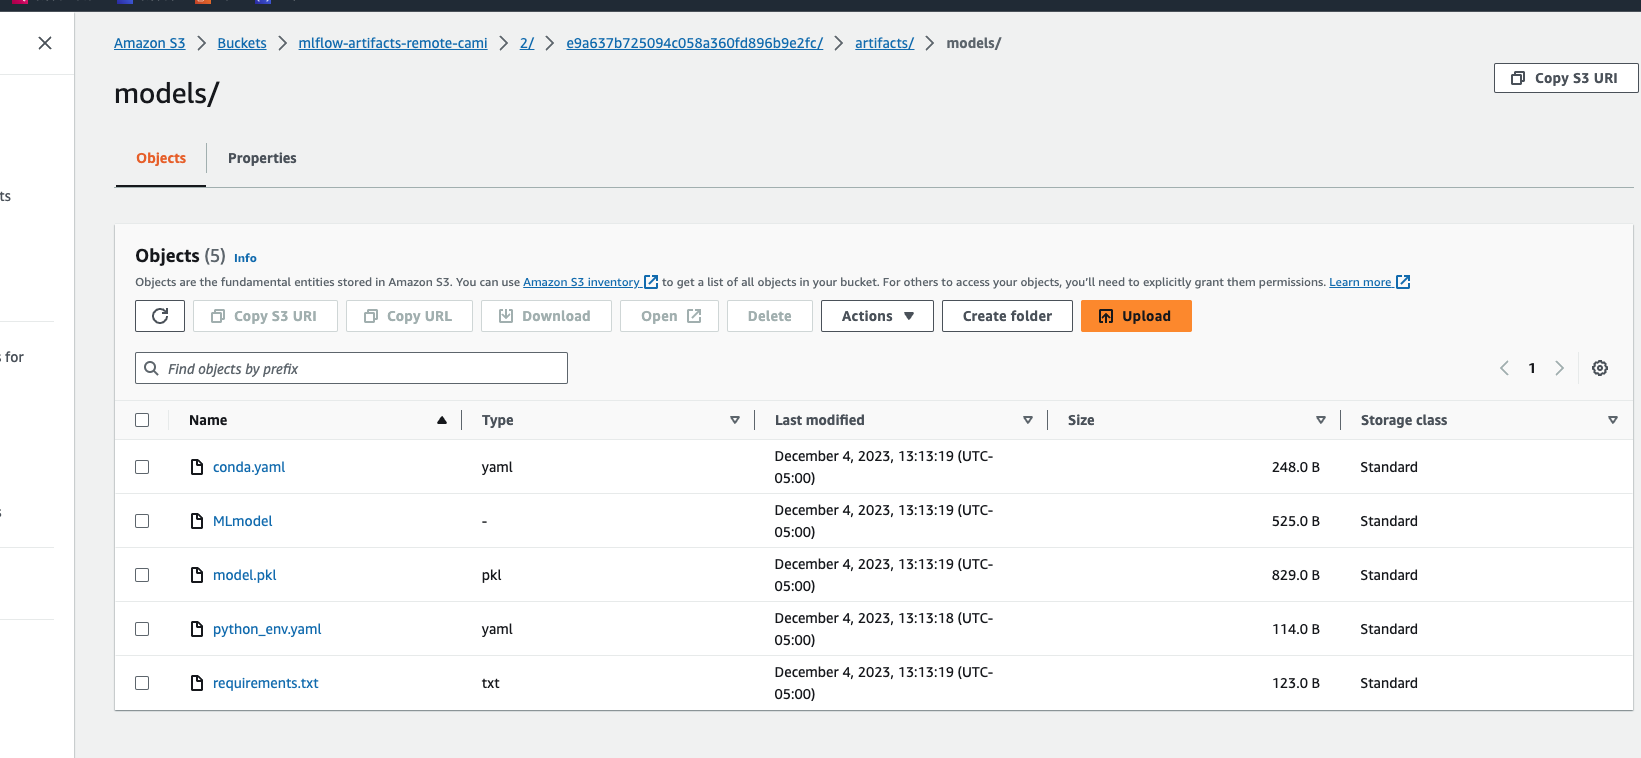

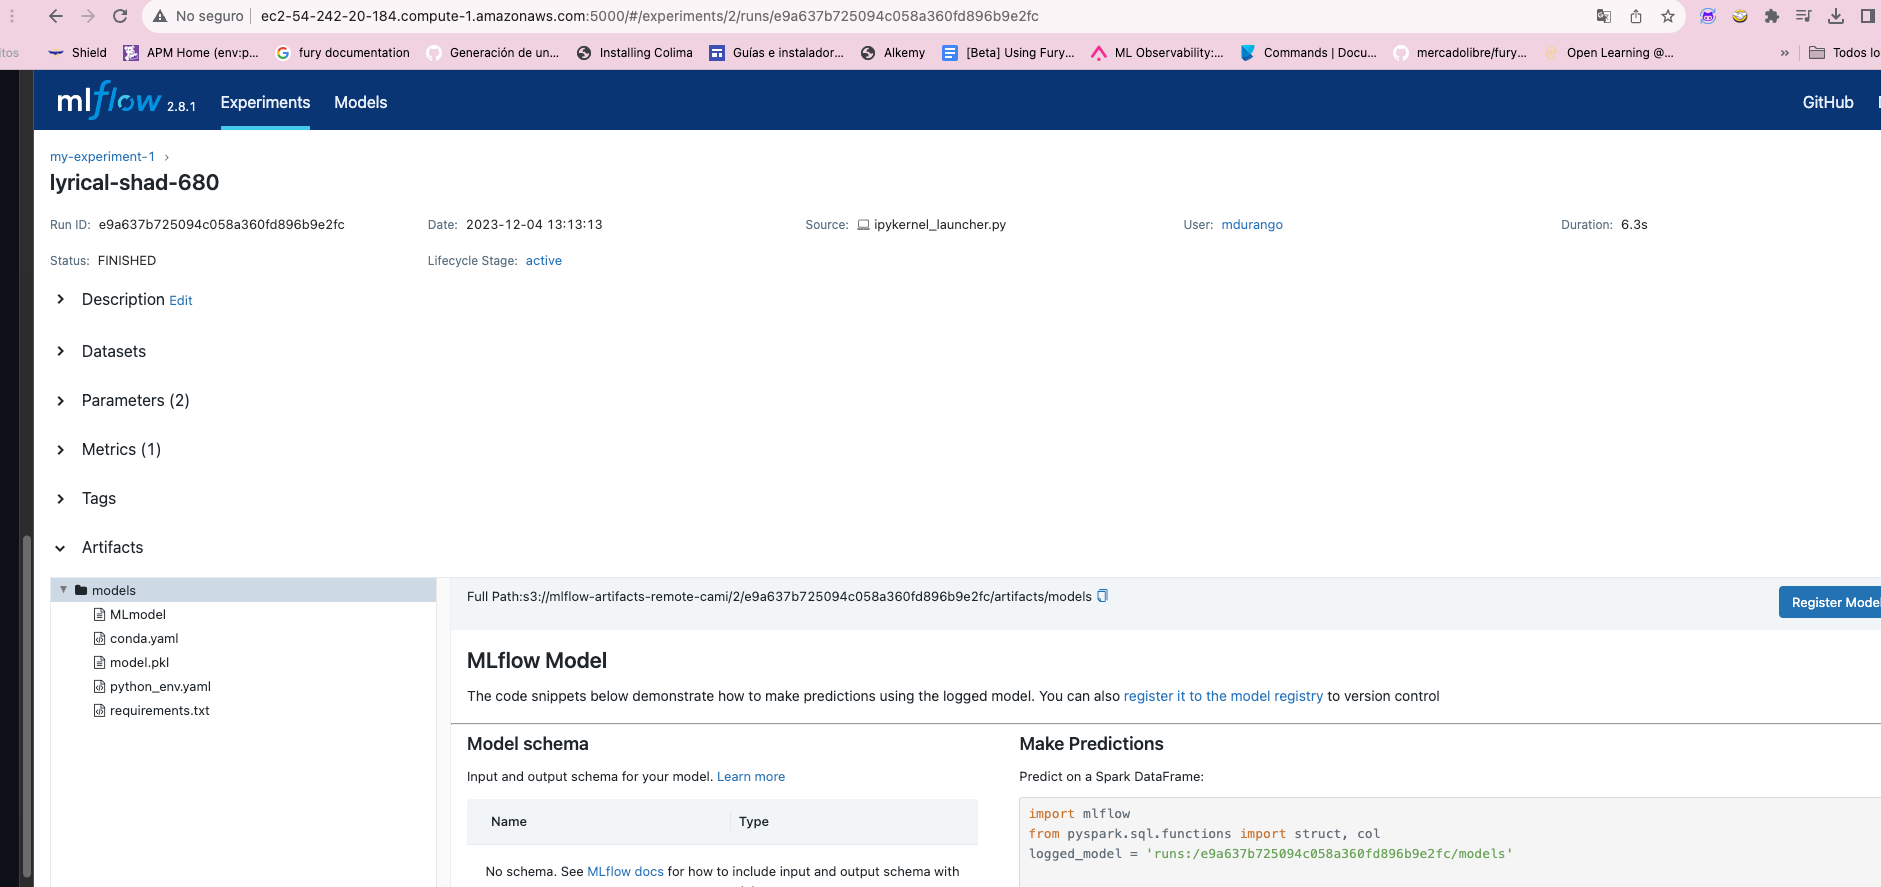

_____

Setup escenario 1: 

* tracking server: no
* backend: local
* artifacts y metadata: local

Setup escenario 2:

* tracking server: sí, sqlite como local server 
* backend store: sqlite database
* artifacts store: local filessystem

Setup escenario 3:

* tracking server: sí, remote server (EC2)
* backend store: Postgres database
* artifacts store: S3 bucket
